In [4]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds # tensorflow datasets for fashion mnist
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data_set = tfds.load('fashion_mnist', split='train') # download the datasets

In [4]:
data_set.as_numpy_iterator().next()['label']

2

In [5]:
import numpy as np

In [6]:
data_iterator = data_set.as_numpy_iterator()

In [7]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

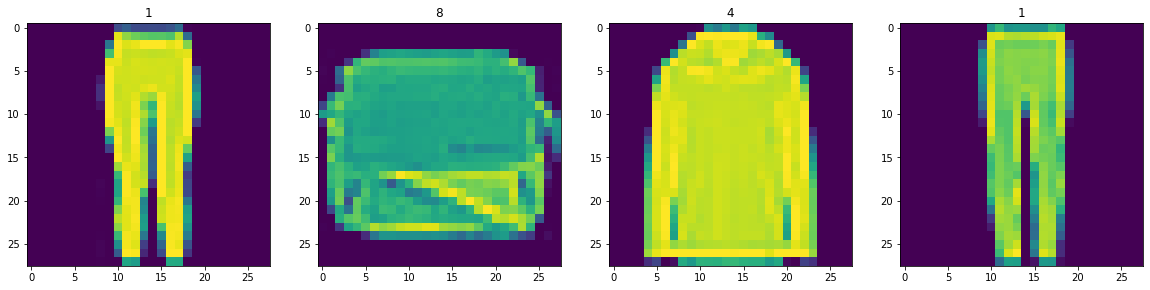

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # setup the subplot
for idx in range(4): #iterate four times and gets images
    sample = data_iterator.next() # grabs the image and label
    ax[idx].imshow(np.squeeze(sample['image'])) # plot the image in the axes
    ax[idx].title.set_text(sample['label'])# plot the label (the numbers on top)

In [9]:
# scale the images
def scale_images(data):
    image = data['image']
    return image / 255

In [10]:
data_set = tfds.load('fashion_mnist', split='train') # reload the dataset
data_set = data_set.map(scale_images)
data_set = data_set.cache() # making cache
data_set = data_set.shuffle(60000)
data_set = data_set.batch(128) # batch it  into 128 images
data_set = data_set.prefetch(64)

In [11]:
data_set.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [13]:
def buid_generator():
    model = Sequential()

    # Takes in random values andd reshapes it to 7x7x128 -beginnings of a generated model
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    # upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))


    # adding more training params
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # adding more training params
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # conv layer to get ton one chaannel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [14]:
generator = buid_generator()

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [29]:
img = generator.predict(np.random.randn(4,128,1))

In [24]:
img.shape

(4, 28, 28, 1)

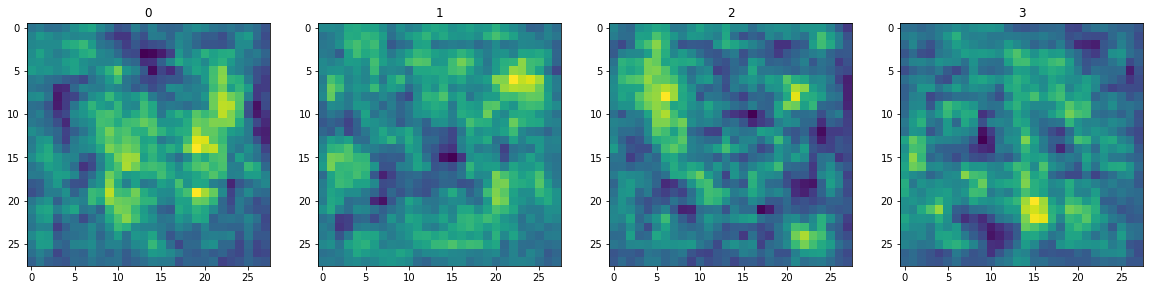

In [18]:
img = generator.predict(np.random.randn(4, 128, 1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # setup the subplot
for idx, img in enumerate(img): #iterate four times and gets images
    ax[idx].imshow(np.squeeze(img)) # plot the image in the axes
    ax[idx].title.set_text(idx)# plot the label (the numbers on top)

In [19]:
def buid_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fouth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [20]:
discriminator = buid_discriminator()

In [21]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [28]:
img.shape

(28, 28, 1)

In [26]:
img = img[0]

In [30]:
discriminator.predict(img)

array([[0.49493152],
       [0.49503666],
       [0.49509087],
       [0.4951718 ]], dtype=float32)

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
generator_opt = Adam(learning_rate=0.0001)
discriminator_opt = Adam(learning_rate=0.00001)
generator_loss = BinaryCrossentropy()
discriminator_loss = BinaryCrossentropy()

In [33]:
from tensorflow.keras.models import Model

In [57]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, generator_opt, discriminator_opt, generator_loss, discriminator_loss, *args, **kwargs):
        super().compile(*args, **kwargs)

        # attribute for losses and optimizers
        self.generator_opt = generator_opt
        self.discriminator_opt = discriminator_opt
        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss
        
    def train_step(self, batch):
        real_images = batch
        fake_image = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as discriminator_tape:
            # pass the real and the fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_image, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            # Add some noise to the outpus
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            # calculate loss
            total_discriminator_loss = self.discriminator_loss(y_realfake, yhat_realfake)
        # Apply backprogation - neural networks learn
        discriminator_gradiant = discriminator_tape.gradient(total_discriminator_loss, self.discriminator.trainable_variables)
        self.discriminator_opt.apply_gradients(zip(discriminator_gradiant, self.discriminator.trainable_variables))

        with tf.GradientTape() as generator_tape:

            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)

            predicted_labels = self.discriminator(gen_images, training=False)

            total_gen_loss = self.generator_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backpropagation
        generator_gradient = generator_tape.gradient(total_gen_loss, self.generator.trainable_variables)
        self.generator_opt.apply_gradients(zip(generator_gradient, self.generator.trainable_variables))

        return {"d_loss":total_discriminator_loss, "g_loss":total_gen_loss}

In [58]:
fashGAN_1 = FashionGAN(generator, discriminator)

In [59]:
fashGAN_1.compile(generator_opt, discriminator_opt, generator_loss, discriminator_loss)

In [38]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [39]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, laten_dim=128):
        self.num_img = num_img
        self.latent_dim = laten_dim
    
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [60]:
historry = fashGAN_1.fit(data_set, epochs=22, callbacks=  [ModelMonitor()])

Epoch 1/2000
469/469 [==============================] - 60s 110ms/step - d_loss: 0.4375 - g_loss: 1.2625
Epoch 2/2000
469/469 [==============================] - 66s 141ms/step - d_loss: 0.5233 - g_loss: 2.4622
Epoch 3/2000
469/469 [==============================] - 98s 209ms/step - d_loss: 0.4405 - g_loss: 4.4577
Epoch 4/2000
469/469 [==============================] - 129s 275ms/step - d_loss: 0.6469 - g_loss: 0.5802
Epoch 5/2000
469/469 [==============================] - 161s 343ms/step - d_loss: 0.4792 - g_loss: 0.1938
Epoch 6/2000
469/469 [==============================] - 184s 392ms/step - d_loss: 0.3332 - g_loss: 0.0341
Epoch 7/2000
469/469 [==============================] - 193s 412ms/step - d_loss: 0.3964 - g_loss: 0.0429
Epoch 8/2000
469/469 [==============================] - 196s 417ms/step - d_loss: 0.7108 - g_loss: 0.5608
Epoch 9/2000
469/469 [==============================] - 196s 418ms/step - d_loss: 0.6897 - g_loss: 0.5947
Epoch 10/2000
469/469 [==========================

KeyboardInterrupt: 

In [61]:
plt.suptitle('Loss')
plt.plot(historry.history['d_loss'], label ='dd_loss')
plt.plot(historry.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

NameError: name 'historry' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))
